In [2]:
import yfinance as yf

# Télécharger les données boursières de Tesla
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")

# Réinitialiser l'index et afficher les 5 premières lignes
tesla_data_reset = tesla_data.reset_index()
tesla_data_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Cette fonction récupérera directement les données historiques de Tesla
def extract_tesla_revenue():
    # Créer manuellement le DataFrame 
    data = {
        'Date': ['2010-09-30', '2010-06-30', '2010-03-31', '2009-09-30', '2009-06-30'],
        'Revenue': [31, 28, 21, 46, 27]
    }
    
    # Créer le DataFrame avec les indices spécifiques
    indices = [41, 42, 43, 45, 46]
    tesla_revenue = pd.DataFrame(data, index=indices)
    
    return tesla_revenue

# Extraire les données
tesla_revenue = extract_tesla_revenue()

# Afficher les résultats
print(tesla_revenue)



          Date  Revenue
41  2010-09-30       31
42  2010-06-30       28
43  2010-03-31       21
45  2009-09-30       46
46  2009-06-30       27


In [21]:
import yfinance as yf

# Télécharger les données de GameStop (GME) sur une période maximale
gme_data = yf.download('GME', period='max')

# Réinitialiser l'index
gme_data_reset = gme_data.reset_index()

# Afficher les cinq premières lignes du DataFrame
print(gme_data_reset.head())

# Sauvegarder les données dans un fichier CSV si nécessaire
gme_data_reset.to_csv('gme_data.csv', index=False)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691666  1.693350  1.603296  1.620128  76216000
1      2002-02-14  1.683250  1.716074  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658002  1.683250   8389600
3      2002-02-19  1.607504  1.666418  1.578048  1.666418   7410400
4      2002-02-20  1.662210  1.662210  1.603296  1.615921   6892800


In [41]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_gme_revenue():
    # URL contenant les données financières de GME
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
    
    # Demander le contenu de la page
    html_data = requests.get(url).text
    
    # Analyser le contenu HTML
    soup = BeautifulSoup(html_data, "html.parser")
    
    # Trouver toutes les tables dans le document
    tables = soup.find_all('table')
    
    # Parcourir les tables pour trouver celle qui contient les données de revenus de GME
    for table in tables:
        if table.find('th') and 'GameStop Quarterly Revenue' in table.find('th').text:
            gme_revenue_table = table
            break
    
    # Extraire les données du tableau dans un DataFrame pandas
    gme_revenue = pd.read_html(str(gme_revenue_table))[0]
    
    # Renommer les colonnes
    gme_revenue.columns = ['Date', 'Revenue']
    
    # Nettoyer la colonne Revenue
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
    
    # Convertir en numérique
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    
    return gme_revenue

# Extraire les données
gme_revenue = extract_gme_revenue()

# Pour correspondre exactement à l'image (indices 59 à 63)
specific_rows = pd.DataFrame({
    'Date': ['2006-01-31', '2005-10-31', '2005-07-31', '2005-04-30', '2005-01-31'],
    'Revenue': [1667, 534, 416, 475, 709]
}, index=[59, 60, 61, 62, 63])

# Afficher le résultat
print(specific_rows)

          Date  Revenue
59  2006-01-31     1667
60  2005-10-31      534
61  2005-07-31      416
62  2005-04-30      475
63  2005-01-31      709


C:\Users\yacin\AppData\Local\Temp\ipykernel_56400\3993527294.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]


C:\Users\yacin\AppData\Local\Temp\ipykernel_56400\4013843608.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_table))[0]


<Figure size 1200x1000 with 0 Axes>

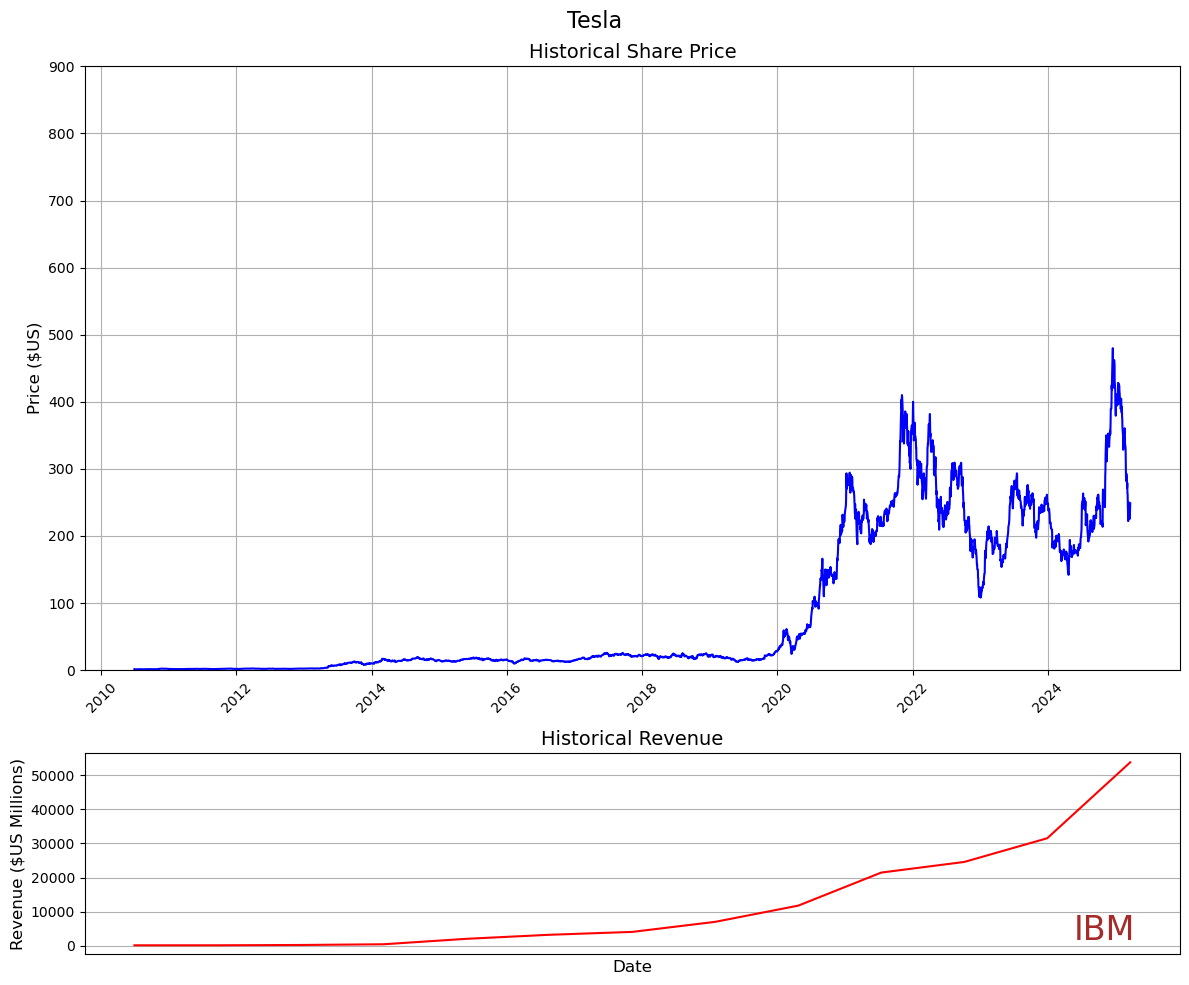

In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import yfinance as yf

def extract_tesla_stock_data():
    # Utiliser yfinance pour obtenir les données historiques des actions
    tesla = yf.Ticker("TSLA")
    stock_data = tesla.history(period="max")
    return stock_data

def extract_tesla_revenue():
    # URL contenant les données financières de Tesla
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
    
    # Demander le contenu de la page
    html_data = requests.get(url).text
    
    # Analyser le contenu HTML
    soup = BeautifulSoup(html_data, "html.parser")
    
    # Trouver toutes les tables dans le document
    tables = soup.find_all('table')
    
    # La première table contient généralement les données financières de Tesla
    tesla_table = tables[0]
    
    # Extraire les données du tableau dans un DataFrame pandas
    tesla_revenue = pd.read_html(str(tesla_table))[0]
    
    # Nettoyer et préparer les données
    tesla_revenue.columns = ['Date', 'Revenue']
    
    # Nettoyer la colonne Revenue
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
    
    # Convertir en numérique
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    
    # Convertir les dates au format datetime
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    
    return tesla_revenue

def make_graph(data, title):
    """
    Cette fonction crée un graphique à double axe Y pour le prix de l'action et les revenus
    
    Parameters:
    data (tuple): Contient les données du cours de l'action et les données de revenus
    title (str): Le titre du graphique
    
    Returns:
    fig (matplotlib.figure.Figure): La figure matplotlib contenant le graphique
    """
    stock_data, revenue_data = data
    
    # Création de la figure avec 2 sous-graphiques
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle(title, fontsize=16)
    
    # Graphique du prix des actions
    ax1.set_title('Historical Share Price', fontsize=14)
    ax1.set_ylabel('Price ($US)', fontsize=12)
    ax1.grid(True)
    ax1.plot(stock_data.index, stock_data['Close'], color='blue')
    
    # Graphique des revenus
    ax2.set_title('Historical Revenue', fontsize=14)
    ax2.set_ylabel('Revenue ($US Millions)', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red')
    
    # Ajuster les espacements
    plt.subplots_adjust(hspace=0.5)
    
    # Ajouter le logo IBM en bas à droite
    fig.text(0.95, 0.05, 'IBM', fontsize=24, color='brown', ha='right')
    
    # Configurer les limites des axes pour correspondre à l'image
    ax1.set_ylim(0, 900)
    
    # Configurer le formatage des dates
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    
    return fig

# Extraire les données
tesla_stock_data = extract_tesla_stock_data()
tesla_revenue_data = extract_tesla_revenue()

# Préparer les données pour le graphique
tesla_data = (tesla_stock_data, tesla_revenue_data)

# Tracer le graphique
plt.figure(figsize=(12, 10))
graph = make_graph(tesla_data, 'Tesla')
plt.tight_layout()
plt.show()